FFR 120  
Felix Waldschock

HW 4
Exercise 14.7
## Logistic growth model

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
plt.style.use(['science','grid'])
from tqdm import trange


# a.)
Solve the logistic equation by the finite-difference method, using the explicit Euler
integration method. Plot the solution obtained for different initial conditions x0, time steps Δt, and parameters r and K. Compare the result with figure 14.8. [Hint: Choose Δ≪ −r^-1 Why?]
 

In [18]:
# parameters
r = 0.1            #  r < 0
K = 2

# initial conditions
x0 = 0.1
dT = 0.05
tMax = 200
t0 = 0

N = int(tMax/dT)

In [19]:
def explicitEulerIntegration(x0, K, r, dT, N):
    # create arrays to store the position and velocity
    x = np.zeros(N)

    # set initial conditions
    x[0] = x0

    # use Euler's method to integrate the equations of motion
    for i in range(N-1):
            x[i+1] = x[i] + (r*x[i] * (1 - x[i]/K)) * dT
    return x


In [20]:
# Analytical expression of the Logisitc Growth Model
def AnalyticalLogisticGrowth(x0, r, K, t, t0):
    num = K
    den = 1 + ((K/x0) - 1) * np.exp(-r*(t-t0))
    return num/den

In [21]:
# compute X numerical
xExplicit = explicitEulerIntegration(x0, K, r, dT, N)

In [22]:
# compute X analytical
t = np.arange(0,tMax,dT)
xAnalytical = AnalyticalLogisticGrowth(x0, r, K, t, t0)

# b.)
Solve the model with Euler Implicit.  
Plot the solutions found for different x0, r, K and dT

In [23]:
def Estimator(x, r, K, dT):
    term1 = (1 - r * dT)
    num = (- term1) + np.sqrt((term1)**2 + 4 * r * dT * (x/K))
    den = 2 * r * dT
    return K * num/den


In [24]:
def implicitEulerIntegration(x0, K, r, dT, N):
    # create arrays to store the position and velocity
    x = np.zeros(N)
    # set initial conditions
    x[0] = x0
    # use Euler's method to integrate the equations of motion
    for i in range(N-1):
            xTilde = Estimator(x[i], r, K, dT)
            x[i+1] = x[i] + (r*xTilde * (1 - xTilde/K)) * dT
    return x



In [25]:
# compute X numerical
xImplicit = implicitEulerIntegration(x0, K, r, dT, N)



# Visualize

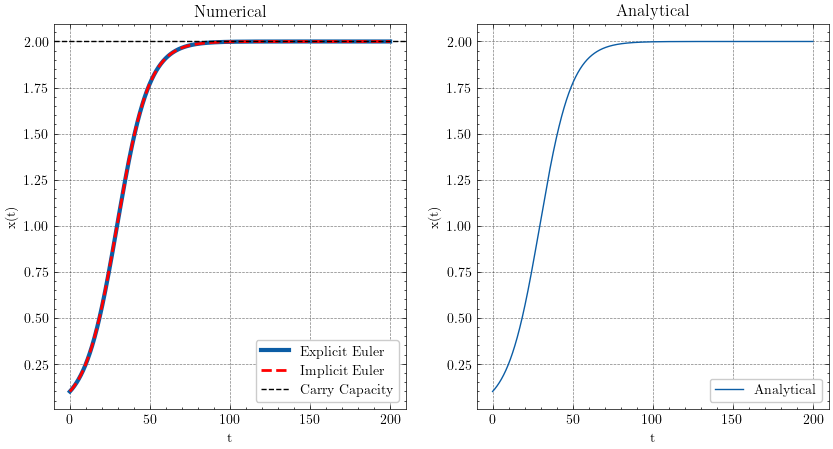

In [26]:
# subplot 1x2 with two numerical solutions to the left, and Analytical solution to the right
fig, ax = plt.subplots(1,2, figsize=(10,5))
t = np.arange(0,tMax,dT)

# plot numerical solutions
ax[0].plot(t, xExplicit, label='Explicit Euler', linewidth=3)

ax[0].plot(t, xImplicit, '--r', label='Implicit Euler', linewidth=2)
ax[0].axhline(y=K, color='black', linestyle='--', label='Carry Capacity')
ax[0].set_xlabel('t')
ax[0].set_ylabel('x(t)')
ax[0].set_title('Numerical')
ax[0].legend()


# plot analytical solution

ax[1].plot(t, xAnalytical, label='Analytical')
# horizontal line at K

ax[1].set_xlabel('t')
ax[1].set_ylabel('x(t)')
ax[1].set_title('Analytical')
ax[1].legend()


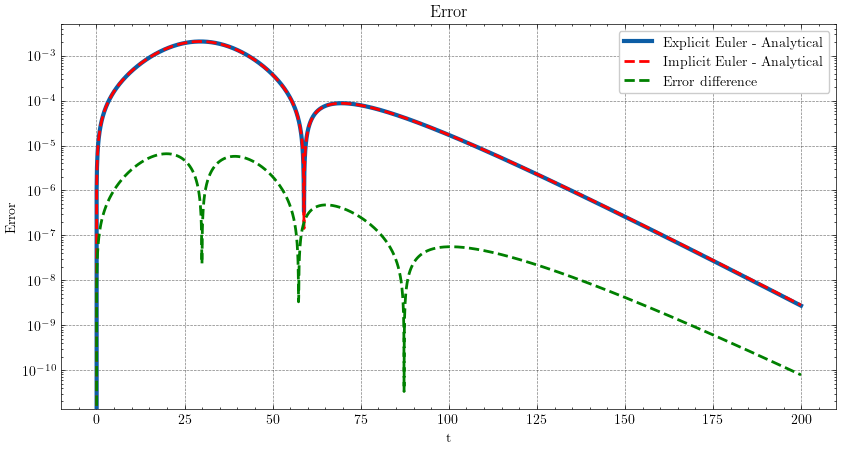

In [27]:
# plot the error between the numerical and analytical solutions
errorExplicit = np.abs(xExplicit - xAnalytical)
errorImplicit = np.abs(xImplicit - xAnalytical)
errorDelta = np.abs(errorExplicit - errorImplicit)

figure = plt.figure(figsize=(10,5))

plt.semilogy(t, errorExplicit, label='Explicit Euler - Analytical', linewidth=3)
plt.semilogy(t, errorImplicit, '--r', label='Implicit Euler - Analytical', linewidth=2)
plt.semilogy(t, errorDelta, '--g', label='Error difference', linewidth=2)
plt.xlabel('t')
plt.ylabel('Error')
plt.title('Error')
plt.legend()
plt.show()


# Compare the 2  models with various parameters

In [28]:
tMax = 100

# subplot with 4x1 plots, showing the numerical solutions for one varying parameter and the analytical solution (so 5 graphs per plot)

####----------------- vary dT -----------------####
dT_01 = 0.05
dT_02 = 5
x0_0 = 2
K_0 = 5
r_0 = 0.05
N_01 = int(tMax/dT_01)
t_01 = np.arange(0,tMax,dT_01)
N_02 = int(tMax/dT_02)
t_02 = np.arange(0,tMax,dT_02)

# compute X numerical  
xExplicit_01 = explicitEulerIntegration(x0_0, K_0, r_0, dT_01, N_01)
xExplicit_02 = explicitEulerIntegration(x0_0, K_0, r_0, dT_02, N_02)
xImplicit_01 = implicitEulerIntegration(x0_0, K_0, r_0, dT_01, N_01)
xImplicit_02 = implicitEulerIntegration(x0_0, K_0, r_0, dT_02, N_02)

# compute X analytical
xAnalytical_01 = AnalyticalLogisticGrowth(x0_0, r_0, K_0, t_01, t0)
xAnalytical_02 = AnalyticalLogisticGrowth(x0_0, r_0, K_0, t_02, t0)


####----------------- vary r -----------------####
dT_1 = 0.05
K_1 = 5
x0_1 = 2
r_11 = 0.05
r_12 = 0.2
N_1 = int(tMax/dT_1)
t_1 = np.arange(0,tMax,dT_1)

# compute X numerical
xExplicit_11 = explicitEulerIntegration(x0_1, K_1, r_11, dT_1, N_1)
xExplicit_12 = explicitEulerIntegration(x0_1, K_1, r_12, dT_1, N_1)
xImplicit_11 = implicitEulerIntegration(x0_1, K_1, r_11, dT_1, N_1)
xImplicit_12 = implicitEulerIntegration(x0_1, K_1, r_12, dT_1, N_1)

# compute X analytical
xAnalytical_11 = AnalyticalLogisticGrowth(x0_1, r_11, K_1, t_1, t0)
xAnalytical_12 = AnalyticalLogisticGrowth(x0_1, r_12, K_1, t_1, t0)


####----------------- vary K -----------------####
dT_2 = 0.05
K_21 = 5
K_22 = 10
x0_2 = 2
r_2 = 0.05
N_2 = int(tMax/dT_2)
t_2 = np.arange(0,tMax,dT_2)

# compute X numerical
xExplicit_21 = explicitEulerIntegration(x0_2, K_21, r_2, dT_2, N_2)
xExplicit_22 = explicitEulerIntegration(x0_2, K_22, r_2, dT_2, N_2)
xImplicit_21 = implicitEulerIntegration(x0_2, K_21, r_2, dT_2, N_2)
xImplicit_22 = implicitEulerIntegration(x0_2, K_22, r_2, dT_2, N_2)

# compute X analytical
xAnalytical_21 = AnalyticalLogisticGrowth(x0_2, r_2, K_21, t_2, t0)
xAnalytical_22 = AnalyticalLogisticGrowth(x0_2, r_2, K_22, t_2, t0)


####----------------- vary x0 -----------------####
dT_3 = 0.05
K_3 = 5
x0_31 = 2
x0_32 = 4
r_3 = 0.05
N_3 = int(tMax/dT_3)
t_3 = np.arange(0,tMax,dT_3)

# compute X numerical
xExplicit_31 = explicitEulerIntegration(x0_31, K_3, r_3, dT_3, N_3)
xExplicit_32 = explicitEulerIntegration(x0_32, K_3, r_3, dT_3, N_3)
xImplicit_31 = implicitEulerIntegration(x0_31, K_3, r_3, dT_3, N_3)
xImplicit_32 = implicitEulerIntegration(x0_32, K_3, r_3, dT_3, N_3)

# compute X analytical
xAnalytical_31 = AnalyticalLogisticGrowth(x0_31, r_3, K_3, t_3, t0)
xAnalytical_32 = AnalyticalLogisticGrowth(x0_32, r_3, K_3, t_3, t0)





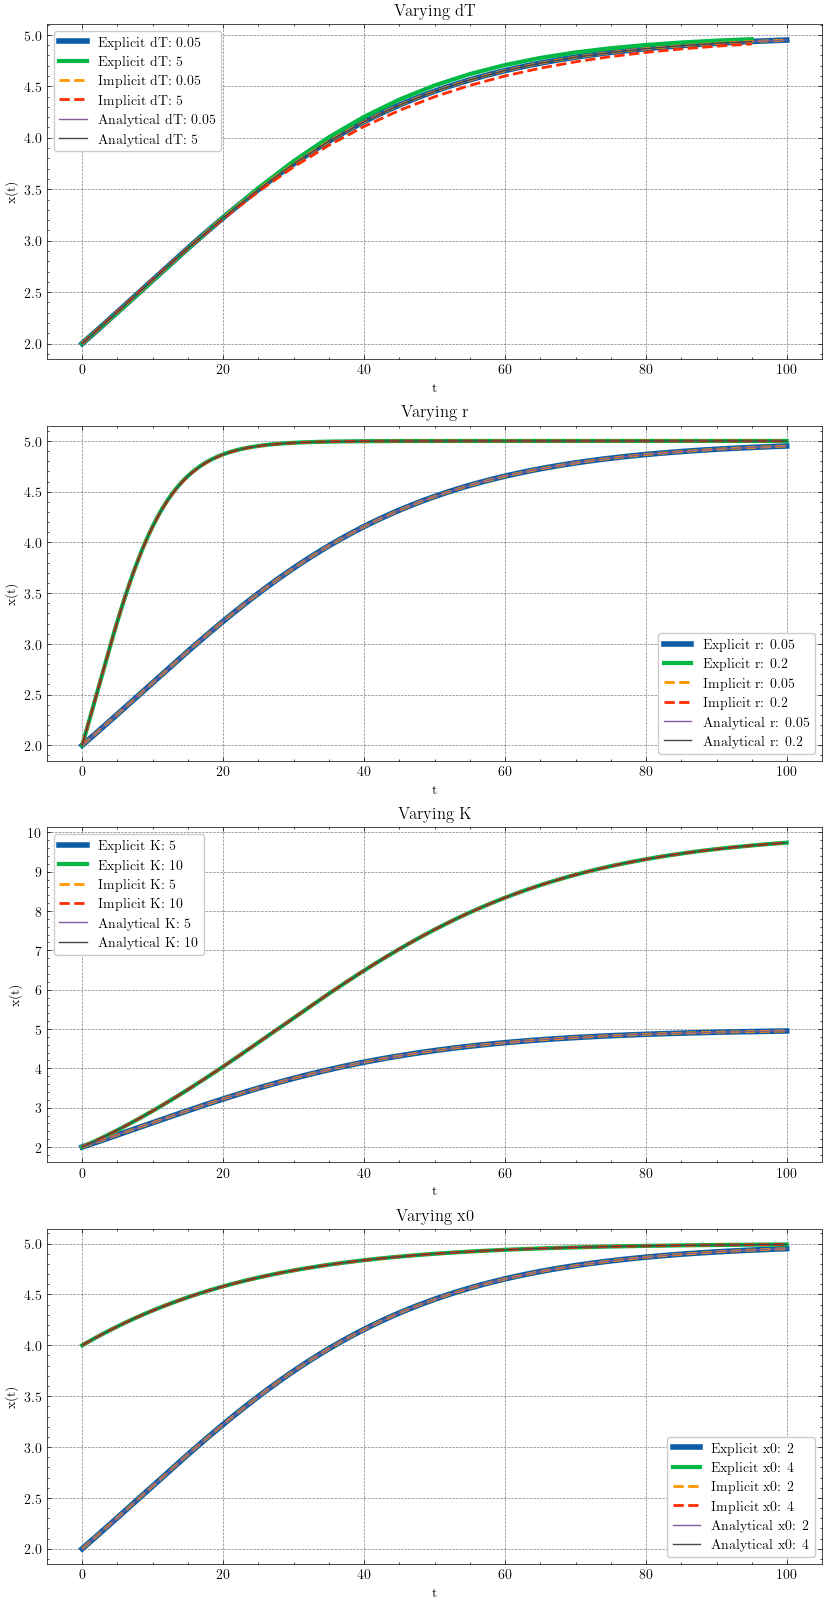

In [29]:
# plot the solutions
fig, ax = plt.subplots(4,1, figsize=(10,20))

# plot the varying dT
ax[0].plot(t_01, xExplicit_01, label='Explicit dT: {dT}'.format(dT=dT_01), linewidth=4)
ax[0].plot(t_02, xExplicit_02, label='Explicit dT: {dT}'.format(dT=dT_02), linewidth=3)
ax[0].plot(t_01, xImplicit_01, '--', label='Implicit dT: {dT}'.format(dT=dT_01), linewidth=2)
ax[0].plot(t_02, xImplicit_02, '--', label='Implicit dT: {dT}'.format(dT=dT_02), linewidth=2)
ax[0].plot(t_01, xAnalytical_01, label='Analytical dT: {dT}'.format(dT=dT_01), linewidth=1)
ax[0].plot(t_02, xAnalytical_02, label='Analytical dT: {dT}'.format(dT=dT_02), linewidth=1)
ax[0].set_xlabel('t')
ax[0].set_ylabel('x(t)')
ax[0].set_title('Varying dT')
ax[0].legend()

# plot the varying r
ax[1].plot(t_1, xExplicit_11, label='Explicit r: {r}'.format(r=r_11), linewidth=4)
ax[1].plot(t_1, xExplicit_12, label='Explicit r: {r}'.format(r=r_12), linewidth=3)
ax[1].plot(t_1, xImplicit_11, '--', label='Implicit r: {r}'.format(r=r_11), linewidth=2)
ax[1].plot(t_1, xImplicit_12, '--', label='Implicit r: {r}'.format(r=r_12), linewidth=2)
ax[1].plot(t_1, xAnalytical_11, label='Analytical r: {r}'.format(r=r_11), linewidth=1)
ax[1].plot(t_1, xAnalytical_12, label='Analytical r: {r}'.format(r=r_12), linewidth=1)
ax[1].set_xlabel('t')
ax[1].set_ylabel('x(t)')
ax[1].set_title('Varying r')
ax[1].legend()

# plot the varying K
ax[2].plot(t_2, xExplicit_21, label='Explicit K: {K}'.format(K=K_21), linewidth=4)
ax[2].plot(t_2, xExplicit_22, label='Explicit K: {K}'.format(K=K_22), linewidth=3)
ax[2].plot(t_2, xImplicit_21, '--', label='Implicit K: {K}'.format(K=K_21), linewidth=2)
ax[2].plot(t_2, xImplicit_22, '--', label='Implicit K: {K}'.format(K=K_22), linewidth=2)
ax[2].plot(t_2, xAnalytical_21, label='Analytical K: {K}'.format(K=K_21), linewidth=1)
ax[2].plot(t_2, xAnalytical_22, label='Analytical K: {K}'.format(K=K_22), linewidth=1)
ax[2].set_xlabel('t')
ax[2].set_ylabel('x(t)')
ax[2].set_title('Varying K')
ax[2].legend()


# plot the varying x0
ax[3].plot(t_3, xExplicit_31, label='Explicit x0: {x0}'.format(x0=x0_31), linewidth=4)
ax[3].plot(t_3, xExplicit_32, label='Explicit x0: {x0}'.format(x0=x0_32), linewidth=3)
ax[3].plot(t_3, xImplicit_31, '--', label='Implicit x0: {x0}'.format(x0=x0_31), linewidth=2)
ax[3].plot(t_3, xImplicit_32, '--', label='Implicit x0: {x0}'.format(x0=x0_32), linewidth=2)
ax[3].plot(t_3, xAnalytical_31, label='Analytical x0: {x0}'.format(x0=x0_31), linewidth=1)
ax[3].plot(t_3, xAnalytical_32, label='Analytical x0: {x0}'.format(x0=x0_32), linewidth=1)
ax[3].set_xlabel('t')
ax[3].set_ylabel('x(t)')
ax[3].set_title('Varying x0')
ax[3].legend()

plt.show()




In [30]:
if(0):tMax = 500

dT_1 = 0.05
x0_1 = 2
K_1 = 5
r_1 = 0.05
N_1 = int(tMax/dT_1)
t_1 = np.arange(0,tMax,dT_1)

X_Explicit_1 = explicitEulerIntegration(x0_1, K_1, r_1, dT_1, N_1)
X_Implicit_1 = implicitEulerIntegration(x0_1, K_1, r_1, dT_1, N_1)
X_Analytical_1 = AnalyticalLogisticGrowth(x0_1, r_1, K_1, t_1, t0)

### 
dT_2 = 0.01
x0_2 = 5
K_2 = 10
r_2 = 2
N_2 = int(tMax/dT_2)
t_2 = np.arange(0,tMax,dT_2)

X_Explicit_2 = explicitEulerIntegration(x0_2, K_2, r_2, dT_2, N_2)
X_Implicit_2 = implicitEulerIntegration(x0_2, K_2, r_2, dT_2, N_2)
X_Analytical_2 = AnalyticalLogisticGrowth(x0_2, r_2, K_2, t_2, t0)

### 
dT_3 = 0.01
x0_3 = 5
K_3 = 20
r_3 = 0.2
N_3 = int(tMax/dT_3)
t_3 = np.arange(0,tMax,dT_3)

X_Explicit_3 = explicitEulerIntegration(x0_3, K_3, r_3, dT_3, N_3)
X_Implicit_3 = implicitEulerIntegration(x0_3, K_3, r_3, dT_3, N_3)
X_Analytical_3 = AnalyticalLogisticGrowth(x0_3, r_3, K_3, t_3, t0)

###
dT_4 = 0.001
x0_4 = 0.01
K_4 = 4
r_4 = 2
N_4 = int(tMax/dT_4)
t_4 = np.arange(0,tMax,dT_4)

X_Explicit_4 = explicitEulerIntegration(x0_4, K_4, r_4, dT_4, N_4)
X_Implicit_4 = implicitEulerIntegration(x0_4, K_4, r_4, dT_4, N_4)
X_Analytical_4 = AnalyticalLogisticGrowth(x0_4, r_4, K_4, t_4, t0)


### 
X_Explicit_ = [X_Explicit_1, X_Explicit_2, X_Explicit_3, X_Explicit_4]
X_Implicit_ = [X_Implicit_1, X_Implicit_2, X_Implicit_3, X_Implicit_4]
X_Analytical_ = [X_Analytical_1, X_Analytical_2, X_Analytical_3, X_Analytical_4]
dT_ = [dT_1, dT_2, dT_3, dT_4]
x0_ = [x0_1, x0_2, x0_3, x0_4]
K_ = [K_1, K_2, K_3, K_4]
r_ = [r_1, r_2, r_3, r_4]
t_ = [t_1, t_2, t_3, t_4]
N_ = [N_1, N_2, N_3, N_4]


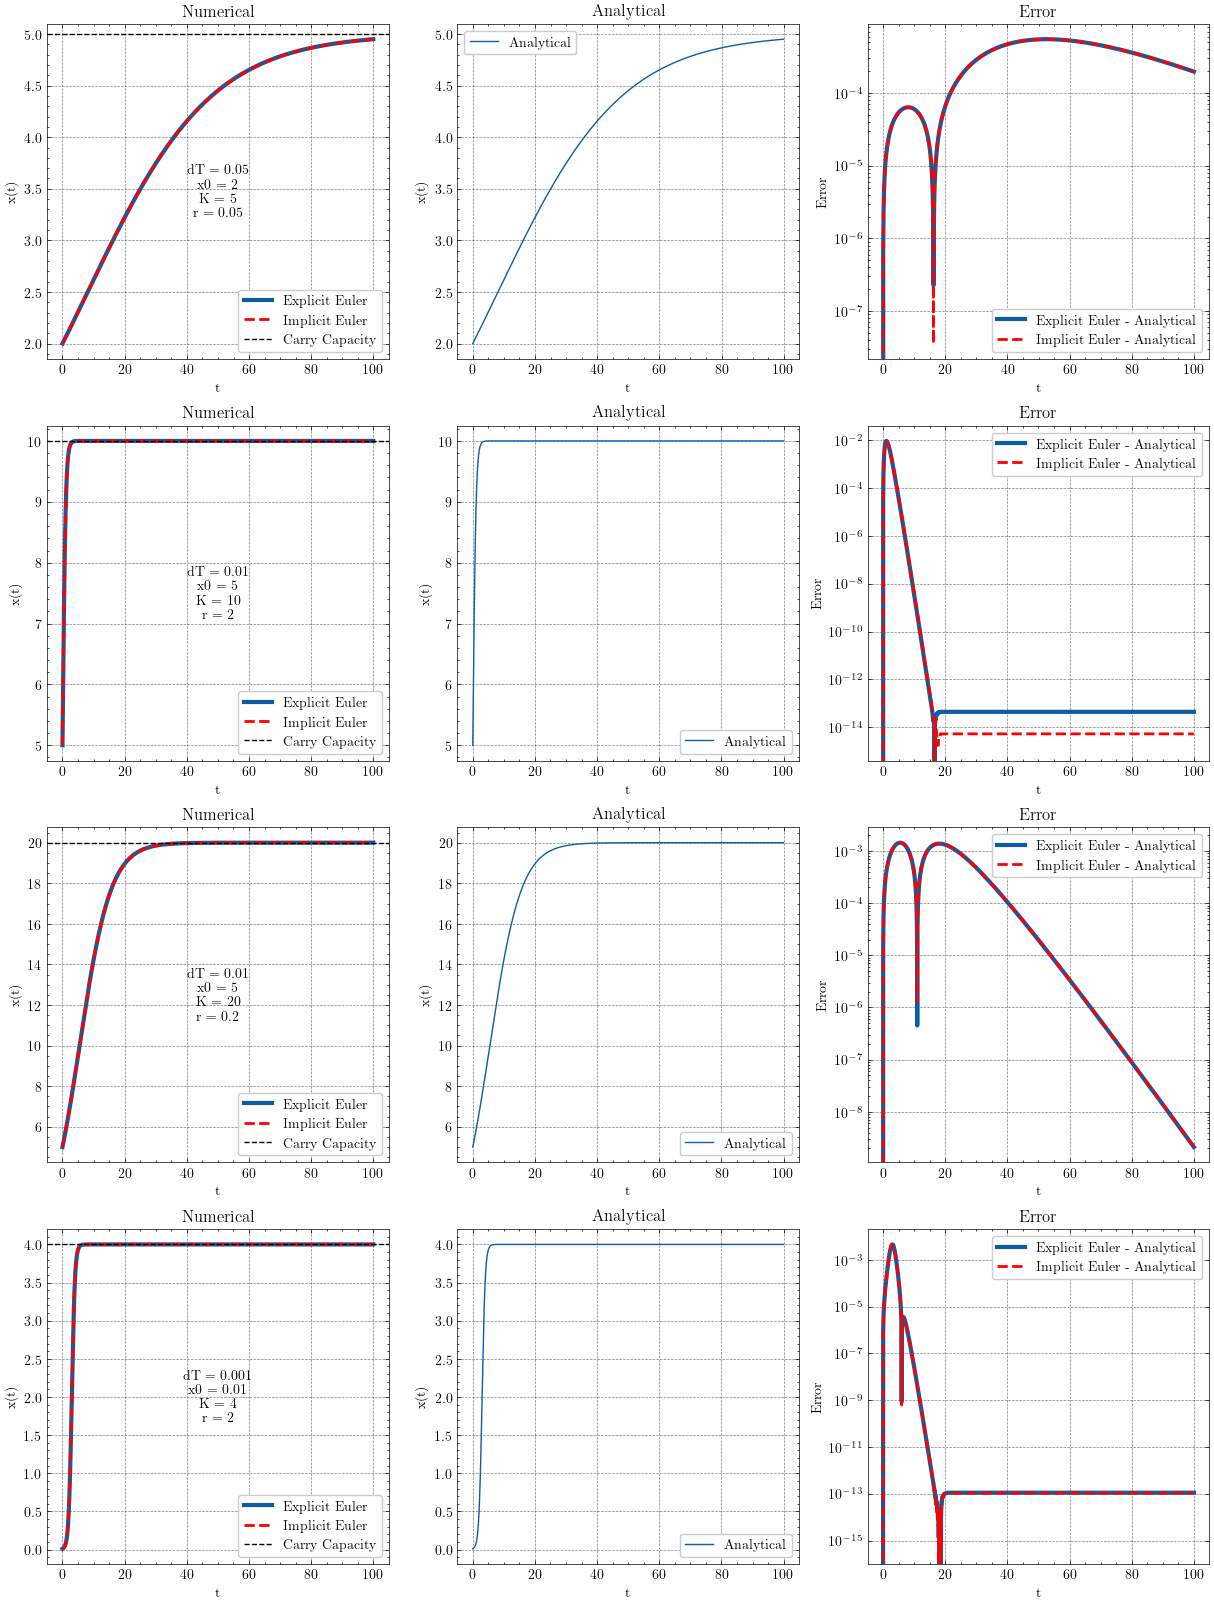

In [31]:
# Plot the numerical solutions
fig, ax = plt.subplots(4,3, figsize=(15,20))

for i in range(4):
    ax[i,0].plot(t_[i], X_Explicit_[i], label='Explicit Euler', linewidth=3)
    ax[i,0].plot(t_[i], X_Implicit_[i], '--r', label='Implicit Euler', linewidth=2)
    # write the parameters in the plot
    ax[i,0].text(0.5, 0.5, f'dT = {dT_[i]} \nx0 = {x0_[i]} \nK = {K_[i]} \nr = {r_[i]}', horizontalalignment='center', verticalalignment='center', transform=ax[i,0].transAxes)
    # horizontal line at K
    ax[i,0].axhline(y=K_[i], color='black', linestyle='--', label='Carry Capacity')

    ax[i,0].set_xlabel('t')
    ax[i,0].set_ylabel('x(t)')
    ax[i,0].set_title('Numerical')
    ax[i,0].legend()

    ax[i,1].plot(t_[i], X_Analytical_[i], label='Analytical')
    ax[i,1].set_xlabel('t')
    ax[i,1].set_ylabel('x(t)')
    ax[i,1].set_title('Analytical')
    ax[i,1].legend()

    # plot the error between the numerical and analytical solutions
    errorExplicit = np.abs(X_Explicit_[i] - X_Analytical_[i])
    errorImplicit = np.abs(X_Implicit_[i] - X_Analytical_[i])

    ax[i,2].semilogy(t_[i], errorExplicit, label='Explicit Euler - Analytical', linewidth=3)
    ax[i,2].semilogy(t_[i], errorImplicit, '--r', label='Implicit Euler - Analytical', linewidth=2)
    ax[i,2].set_xlabel('t')
    ax[i,2].set_ylabel('Error')
    ax[i,2].set_title('Error')
    ax[i,2].legend()